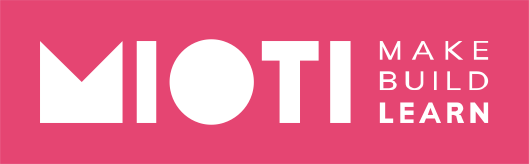

# EJEMPLOS REGRESIÓN


## Contexto
Hay cuatro tipos de aprendizaje: 
- supervisado, 
- no supervisado, 
- semi-supervisado 
- y aprendizaje por refuerzo.

Dentro de los *supervisados* se encuentra la **regresión lineal**, que es una tool útil para predecir una respuesta cuantitativa.

>> En sentido amplio, lo que hace una regresión lineal es obtener la relación entre unas variables independientes (X) y una variable dependiente (Y). 
Es decir, teniendo una serie de variables predictoras obtiene la relación con una variable cuantitativa a predecir. 

>> La regresión lineal explica la variable Y con las variables X, y obtiene la función lineal que mejor se ajusta o explica esta relación.

# Regresión Lineal

La **regresión lineal simple** supone que los valores de la *variable dependiente*, a los que llamaremos $y_i$, pueden escribirse en función de los valores de una única variable independiente, los cuales notaremos por $x_i$, según el siguiente modelo lineal:

 $$ Yi=β0+β1Xi+ϵi$$
donde $β_0$ y $β_1$ son los parámetros desconocidos que vamos a estimar.

Habitualmente, al iniciar un estudio de regresión lineal simple se suelen representar los valores de la variable dependiente y de la variable independiente de forma conjunta mediante un **diagrama de dispersión** para determinar si realmente existe una relación lineal entre ambas. 

Para realizar un diagrama de dispersión en Python utilizaremos plot.
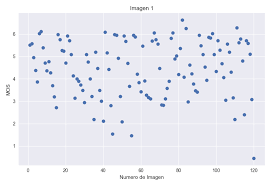

En caso de que en el diagrama de dispersión se aprecie un patrón lineal entre las dos variables, se podrá asumir una cierta relación lineal entre ambas variables y se procederá a ajustar el modelo de regresión lineal simple.

Después de comprobar gráficamente la relación lineal entre las variables, el siguiente paso es la estimación de los valores de los parámetros β0 y β1, a partir de un conjunto de datos. 

## Dicho de otra manera

>> Una **regresión lineal** es un acercamiento para estimar la relación lineal entre dos tipos de variables, una variable de respuesta $Y$ y otra u otras variables explicativas $Xi$.  
Es el modelo más usado y es una técnica fundamental a la hora de analizar datos. El modelo es de la forma:

# $$ y = X\beta + \epsilon $$

Donde Y es un vector n x 1, X es una matriz n x p,  β es un **vector de coeficientes** p x 1 y  ϵ es el término de **error normal estandar**. Normalmente a un modelo donde p = 1 lo llamamos modelo de **regresión lineal simple** y un modelo donde p > 1 lo llamamos modelo de **regresión lineal múltiple o multivariado.**

Siempre que construímos un modelo habrá desviaciones entre lo que el *modelo predice* y lo que *se observa* en la muestra. La diferencia entre esos valores es conocido como los **residuales  del modelo**, que son usados para probar algunos supuestos básicos que van con la construcción del modelo. Los supuestos claves a probar son:

* Ajuste lineal: La suposición que la relación entre las variables son lineales
* Homoscedasticidad: La varianza de los datos es constante.
* Independientes e idénticamente distribuídos: Los resudiales de la regresión deben ser independientes e idénticamente distribuídos y no mostrar señales de correlación.
    
Utilizamos los residuales para ayudarnos a diagnosticar si la relación que estimamos es verdadera o espuria (o sea falsa)

### Residuales
La definición de **residuales** es la diferencia entre los datos que se observan en la muestra y lo que se predice con el modelo de regresión, Para algún residual $r_i$, nosotros expresamos esto como

# $$r_i = Y_i - \hat{Y_i}$$

Donde $Y_i$ es el valor observado $Y$ y el $\hat{Y}_i$ es el valor Y predictivo. Nosotros a continuación graficaremos esas diferencias.

### Heteroscedasticidad
Uno de los principales supuestos detrás del modelo de regresión lineal es sobre la varianza constante en los datos, si la varianza es diferente en una parte de los datos a otra parte es posible que el modelo lineal no sea la mejor opción.

**Heteroscedasticidad** es el término para nombrar el fenómeno de varianza no constante. Heteroscedasticidad significativa invalida los resultados por un sesgo en el error estandar del modelo. Como resultado no podríamos confiar en el resultado de la significancia del test y el intervalo de confianza generado por el modelo y sus parámetros.

Para evitar esas consecuenscias es importante graficar los residuales.

# Ejemplo 1 de regresión lineal



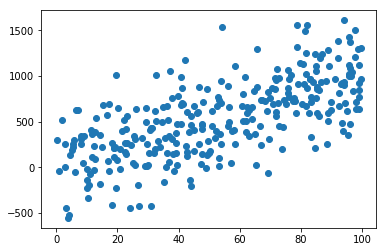

In [2]:
import numpy as np
import random
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline
 
# Generador de distribución de datos para regresión lineal simple
def generador_datos_simple(beta, muestras, desviacion):
    
    # Genero n (muestras) valores de x aleatorios entre 0 y 100
    x = np.random.random(muestras) * 100
    
    # Genero un error aleatorio gaussiano con desviación típica (desviacion)
    e = np.random.randn(muestras) * desviacion
    
    # Obtengo el y real como x*beta + error
    y = x * beta + e
    
    return x.reshape((muestras,1)), y.reshape((muestras,1))
 
# Parámetros de la distribución
desviacion = 300

#Este coeficiente nos indica el número de unidades 
#que aumentará la variable dependiente o criterio 
#por cada unidad que aumente la variable independiente
beta = 10
n = 300
x, y = generador_datos_simple(beta, n, desviacion)
 
# Represento los datos generados (Diagrama de Dispersión)
plt.scatter(x, y)
plt.show()


In [11]:
# Creo un modelo de regresión lineal
modelo = linear_model.LinearRegression()
 
# Entreno el modelo con los datos (X,Y)
modelo.fit(x, y)

# Obtenemos el coeficiente b_1
#Expresa la pendiente de la recta de regresión en el caso de que todas las variables estén transformadas en puntuaciones Z
print ('Coeficiente beta1: ', modelo.coef_[0])
 
# Podemos predecir usando el modelo
y_pred = modelo.predict(x)
 
# Por último, calculamos el error cuadrático medio y el estadístico R^2
print ('Error cuadrático medio: %.2f' % mean_squared_error(y, y_pred))
print ('Estadístico R_2: %.2f' % r2_score(y, y_pred))


Coeficiente beta1:  [10.47113569]
Error cuadrático medio: 100998.03
Estadístico R_2: 0.48


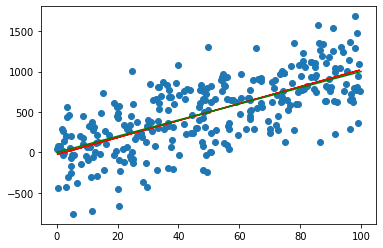

In [12]:
# Representamos el ajuste (rojo) y la recta Y = beta*x (verde)
plt.scatter(x, y)
plt.plot(x, y_pred, color='red')
x_real = np.array([0, 100])
y_real = x_real*beta
plt.plot(x_real, y_real, color='green')
plt.show()


# Ejemplo 2 de regresión lineal. 
### Predicción: ¿Cuántas veces será compartido un artículo del Blog?

Intentaremos predecir cuántas veces será compartido en Redes Sociales un artículo de Machine Learning segun algunas de sus características

Vamos a comenzar por Importar y Visualizar los datos

In [3]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
#cargamos los datos de entrada
dataframe = pd.read_csv("articulos_ml.csv")

In [5]:
#veamos cuantas dimensiones y registros contiene
dataframe.shape

(161, 8)

In [8]:
#son 161 registros con 8 columnas. Veamos los primeros registros para tener una idea
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Title           161 non-null    object 
 1   url             122 non-null    object 
 2   Word count      161 non-null    int64  
 3   # of Links      161 non-null    int64  
 4   # of comments   129 non-null    float64
 5   # Images video  161 non-null    int64  
 6   Elapsed days    161 non-null    int64  
 7   # Shares        161 non-null    int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 10.2+ KB


Vemos que algunos campos ( *por ejemplo en comentarios y url* ) tienen valores nulos.

En nuestro caso la columna Shares será nuestra salida, es decir nuestro valor "Y", el valor que queremos predecir

In [18]:
# Ahora veamos algunas estadísticas de nuestros datos
dataframe.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


De aqui observamos que por ejemplo la media de Cantidad de palabras es 1808

Hay un artíclo mínimo con 250 palabras y el máximo contiene 8401.

Y en cuanto a las salidas, vemos mínimo de 0 veces compartido y máximo de 350000 (eso es mucho!)

## Visualización General

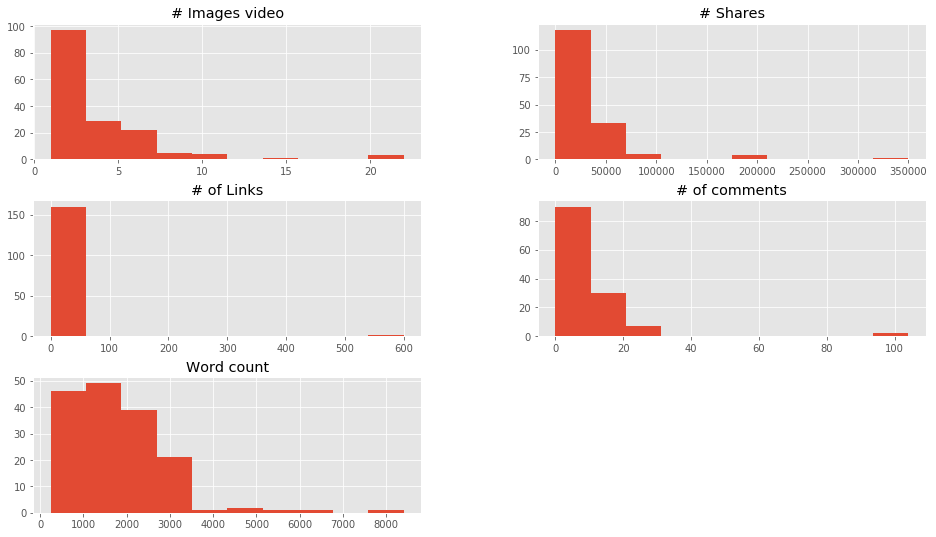

In [7]:
# Visualizamos rápidamente las caraterísticas de entrada
dataframe.drop(['Title','url', 'Elapsed days'],1).hist()
plt.show()

## Visualizamos Cantidad de Palabras vs. Compartidos

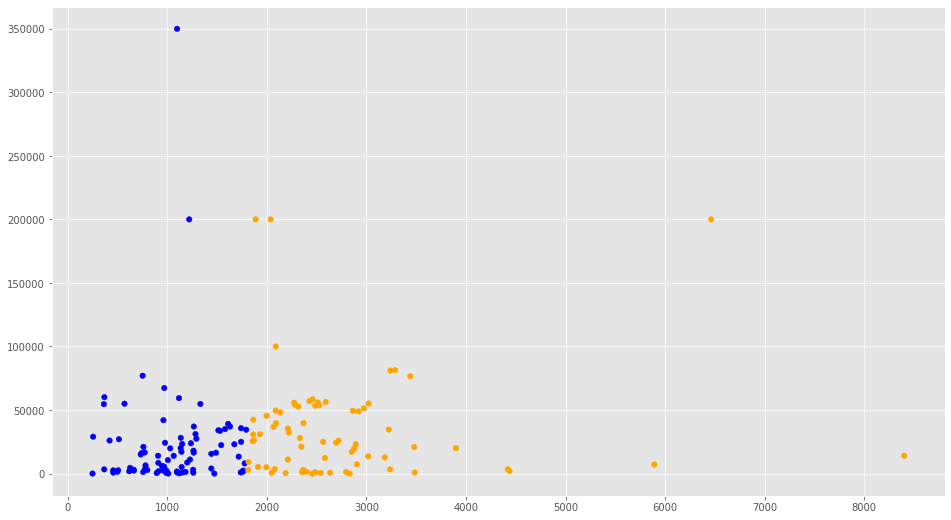

In [22]:
#vamos a Visualizar los datos de entrada
colores=['orange','blue']
tamanios=[30,60]

f1 = dataframe['Word count'].values
f2 = dataframe['# Shares'].values

# Vamos a pintar en 2 colores los puntos por debajo de la media de Cantidad de Palabras
asignar=[]
for index, row in dataframe.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

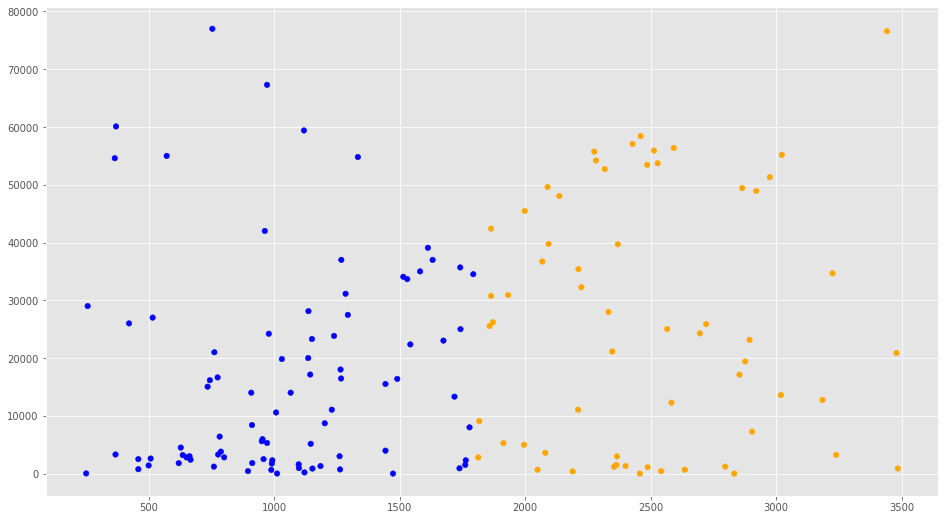

In [24]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = dataframe[(dataframe['Word count'] <= 3500) & (dataframe['# Shares'] <= 80000)]

f1 = filtered_data['Word count'].values
f2 = filtered_data['# Shares'].values

# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['Word count']>1808):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [25]:
# Veamos como cambian los valores una vez filtrados
filtered_data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,148.000000,148.000000,121.000000,148.000000,148.000000,148.000000
mean,1640.209459,5.743243,7.256198,3.331081,91.554054,20545.648649
std,821.975365,6.064418,6.346297,2.706476,91.143923,19933.865031
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,971.000000,3.000000,2.000000,1.000000,28.750000,2750.000000
50%,1536.000000,5.000000,6.000000,3.000000,60.000000,15836.000000
75%,2335.750000,7.000000,11.000000,4.000000,110.500000,34177.500000
max,3485.000000,49.000000,30.000000,22.000000,349.000000,77000.000000


## Regresión Lineal Simple (1 variable)

Vamos a intentar primero una Regresión Lineal con 1 sóla variable

In [26]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX =filtered_data[["Word count"]]
X_train = np.array(dataX)
Y_train = filtered_data['# Shares'].values

In [27]:
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, Y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficients: \n', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Independent term: \n', regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(Y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variance score: %.2f' % r2_score(Y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.303223074163
Mean squared error: 372888728.34
Variance score: 0.06


## Visualizamos la Recta que obtuvimos

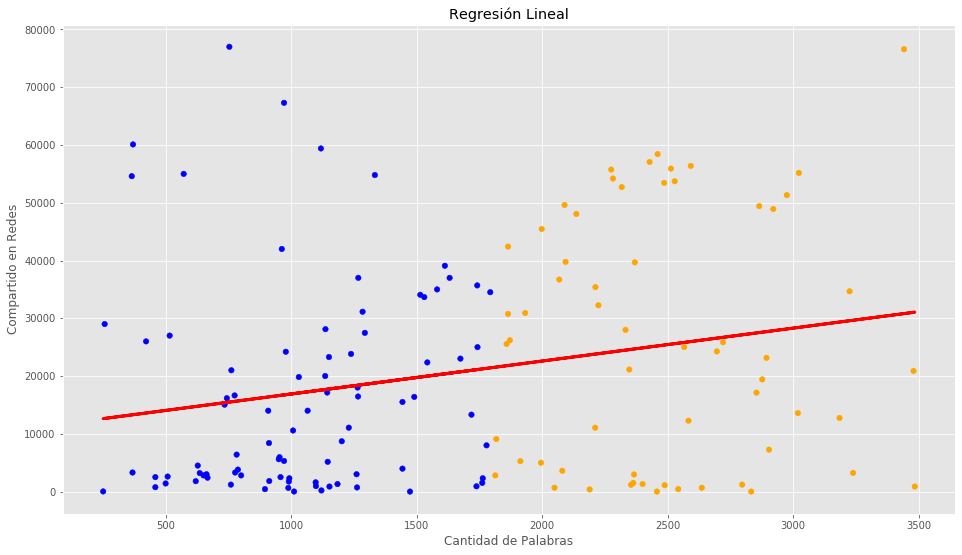

In [28]:
plt.scatter(X_train[:,0], Y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='red', linewidth=3)

plt.xlabel('Cantidad de Palabras')
plt.ylabel('Compartido en Redes')
plt.title('Regresión Lineal')

plt.show()

### Predicción 1

In [29]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595



# Regresión Lineal Múltiples (múltiples variables)

In [30]:
#Vamos a intentar mejorar el Modelo, con una dimensión más: 
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])

dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

Atención: Esta vez, nuestras dimensiones de entrenamiento serán X e Y y las etiquetas de predicción serán z.

In [31]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)

# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


## Esta vez visualizamos un plano

Text(0.5, 0.92, 'Regresión Lineal con Múltiples Variables')

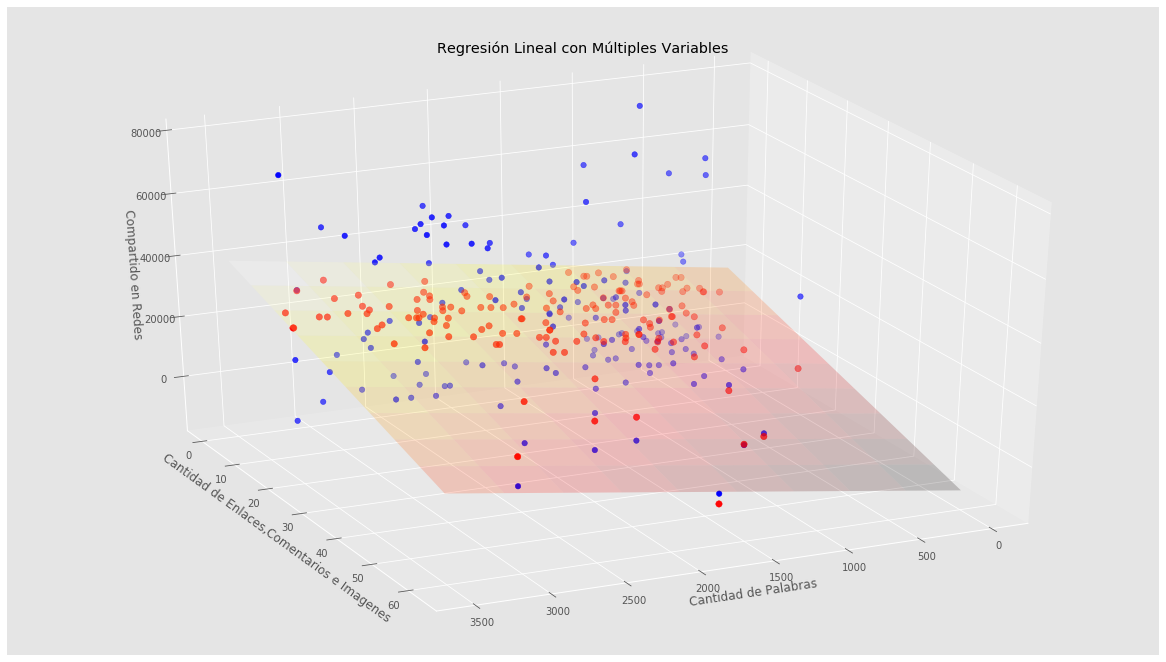

In [32]:
fig = plt.figure()
ax = Axes3D(fig)

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy) 

# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue',s=30)

# Graficamos en rojo, los puntos que 
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red',s=40)

# con esto situamos la "camara" con la que visualizamos
ax.view_init(elev=30., azim=65)
        
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces,Comentarios e Imagenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

### Predicción 2

In [33]:
# Si quiero predecir cuántos "Shares" voy a obtener por un artículo con: 
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:

z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


## Comparemos las predicciónes obtenidas en los modelos

En este caso, Obtuvimos mejora en el modelo de 2 dimensiones

In [34]:
# Restamos los errores calculados antes:
# Obviamente, "menos error" es mejor
mejoraEnError = mean_squared_error(Y_train, y_pred) - mean_squared_error(z_train, z_pred)
print(mejoraEnError)

20765911.860715985


In [35]:
# También calculamos la mejora en la varianza:
mejoraEnVarianza = r2_score(z_train, z_pred) - r2_score(Y_train, y_pred)
print(mejoraEnVarianza)
# Aunque no parezca mucho, recordemos que el valor más alto que se puede obtener es 1.0

0.052615337462582956


In [36]:
# Finalmente, mejoramos en nuestra predicción de un artículo de 2.000 palabras, 
# pues aunque disminuyen los "Shares" que obtendremos en el 2do modelo, 
# seguramente será un valor más cercano a la realidad
diferenciaComparir = z_Dosmil - y_Dosmil
print(int(diferenciaComparir))

-2077
